In [29]:
print('Python current version: ')
!python --version

Python current version: 
Python 3.10.12


In [30]:
from google.colab import drive, runtime

In [31]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Constants

Defines all constants used in the code

In [32]:
# Paths
DRIVE_DIR = '/content/drive/MyDrive'
PROJECT_ROOT_DIR = f'{DRIVE_DIR}/src'
DATA_DIR = f'{PROJECT_ROOT_DIR}/data'
HYPERPARAMS_DIR = f'{PROJECT_ROOT_DIR}/hyperparams'
MODULES_DIR = f'{PROJECT_ROOT_DIR}/modules'
IMG_DIR = f'{DATA_DIR}/images'

IMG_SIZE = 224
FULL_COLUMN_LABELS = {
    "MEL": "Melanoma",
    "NV": "Melanocytic nevus",
    "BCC": "Basal cell carcinoma",
    "AK": "Actinic keratosis",
    "BKL": "Benign keratosis",
    "DF": "Dermatofibroma",
    "VASC": "Vascular lesion",
    "SCC": "Squamous cell carcinoma",
    "UNK": "None of the others"
  }

## Understanding the data

In this section, the data used will be visualized for better understanding

In [33]:
import pandas as pd
print(f'Pandas Version: {pd.__version__}')

Pandas Version: 2.1.4


In [34]:
isic_original_data = pd.read_csv(f'{DATA_DIR}/ISIC_2019_Training_GroundTruth.csv')
isic_subsample_data = pd.read_csv(f'{DATA_DIR}/ISIC_2019_subsample.csv')

In [35]:
isic_original_data.head(3)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
isic_subsample_data.head(3)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0062914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0069300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0014059_downsampled,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
isic_original_data.describe()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
count,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.0
mean,0.178516,0.508270,0.131183,0.034227,0.103588,0.009435,0.009988,0.024792,0.0
std,0.382954,0.499941,0.337607,0.181815,0.304732,0.096677,0.099440,0.155493,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [38]:
isic_subsample_data.describe()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.0
mean,0.500000,0.093889,0.093889,0.093889,0.093889,0.026556,0.028111,0.069778,0.0
std,0.500028,0.291690,0.291690,0.291690,0.291690,0.160789,0.165299,0.254786,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [39]:
print(f'ISIC original dataframe shape: {isic_original_data.shape}')
print(f'ISIC subsample dataframe shape: {isic_subsample_data.shape}')

ISIC original dataframe shape: (25331, 10)
ISIC subsample dataframe shape: (9000, 10)


In [40]:
(((isic_original_data.iloc[:, 1:].rename(columns=FULL_COLUMN_LABELS)) == 1.0).sum())

,0
Melanoma,4522
Melanocytic nevus,12875
Basal cell carcinoma,3323
Actinic keratosis,867
Benign keratosis,2624
Dermatofibroma,239
Vascular lesion,253
Squamous cell carcinoma,628
None of the others,0


In [41]:
(((isic_subsample_data.iloc[:, 1:].rename(columns=FULL_COLUMN_LABELS)) == 1.0).sum())

,0
Melanoma,4500
Melanocytic nevus,845
Basal cell carcinoma,845
Actinic keratosis,845
Benign keratosis,845
Dermatofibroma,239
Vascular lesion,253
Squamous cell carcinoma,628
None of the others,0


In [42]:
df_original = isic_original_data[['image', 'MEL']].copy().rename(columns={'MEL': 'label'})
df_subsample = isic_subsample_data[['image', 'MEL']].copy().rename(columns={'MEL': 'label'})

In [43]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   label   25331 non-null  float64
dtypes: float64(1), object(1)
memory usage: 395.9+ KB


In [44]:
df_subsample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   9000 non-null   object 
 1   label   9000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.8+ KB


In [45]:
df_original.describe()

,label
count,25331.000000
mean,0.178516
std,0.382954
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [46]:
df_subsample.describe()

,label
count,9000.000000
mean,0.500000
std,0.500028
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [47]:
def print_table_sample_info(df, dataset_name):
  melanoma_samples = (((df == 1.0).values).sum())
  non_melanoma_samples = (((df == 0.0).values).sum())
  total_samples = non_melanoma_samples + melanoma_samples

  non_melanoma_samples_percent = (non_melanoma_samples * 100) / total_samples
  melanoma_samples_percent = (melanoma_samples * 100) / total_samples

  amount_samples = {
      1: ['Non-melanoma', non_melanoma_samples, f'{non_melanoma_samples_percent:.2f}%'],
      2: ['Melanoma', melanoma_samples, f'{melanoma_samples_percent:.2f}%']
    }

  print('{:>35}'.format(f'{dataset_name} SAMPLES\n'))

  print("{:<15} {:<15} {:<15}".format('DIAGNOSTIC', 'N_SAMPLES', 'PERCENTAGE_OF_TOTAL'))
  print('-' * 52)

  for key, value in amount_samples.items():
      diagnostic, n_samples, percent_of_total = value
      print("{:<15} {:<15} {:<15}".format(diagnostic, n_samples, percent_of_total))

  print('-' * 52)
  print("{:<15} {:<15} {:<15}\n".format('Total', total_samples, f'{(non_melanoma_samples_percent + melanoma_samples_percent):.2f}%'))

In [48]:
print_table_sample_info(df_original, 'ORIGINAL DATAFRAME')
print_table_sample_info(df_subsample, 'SUBSAMPLE DATAFRAME')

        ORIGINAL DATAFRAME SAMPLES

DIAGNOSTIC      N_SAMPLES       PERCENTAGE_OF_TOTAL
----------------------------------------------------
Non-melanoma    20809           82.15%         
Melanoma        4522            17.85%         
----------------------------------------------------
Total           25331           100.00%        

       SUBSAMPLE DATAFRAME SAMPLES

DIAGNOSTIC      N_SAMPLES       PERCENTAGE_OF_TOTAL
----------------------------------------------------
Non-melanoma    4500            50.00%         
Melanoma        4500            50.00%         
----------------------------------------------------
Total           9000            100.00%        



In [49]:
classes_in_label = df_subsample['label'].unique().tolist()
classes_in_label.sort()
non_melanoma_class, melanoma_class = classes_in_label

print('{:>20}'.format('DATAFRAME LABELS\n'))

print("{:<15} {:<15}".format('Class', 'Value'))
print('-' * 23)
print("{:<15} {:<15}".format('Non-melanoma', non_melanoma_class))
print("{:<15} {:<15}".format('Melanoma', melanoma_class))

   DATAFRAME LABELS

Class           Value          
-----------------------
Non-melanoma    0.0            
Melanoma        1.0            


## Load custom modules

Load utils and helper functions

In [50]:
import sys

# Adding the modules path to sys.path
sys.path.append(MODULES_DIR)

In [51]:
# Importing custom modules
from datetime_helper import get_formatted_datetime as gf_datetime, get_formatted_total_runtime as gft_runtime

## Defining the custom dataset

In [52]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms as T

import os
from timeit import default_timer as timer
from datetime import timedelta
from tqdm import tqdm

In [53]:
import PIL
print(f'Pillow Version: {PIL.__version__}')

Pillow Version: 10.4.0


In [54]:
print(f'PyTorch version: {torch.__version__}')

PyTorch version: 2.4.1+cu121


In [55]:
class_to_idx = {'non-melanoma': 0, 'melanoma': 1}

In [56]:
def get_dataset_classes(class_obj):
  class_to_idx = class_obj
  idx_to_class = {val: key for key, val in class_obj.items()}
  classes = list(class_to_idx.keys())
  num_classes = len(classes)

  return classes, num_classes, class_to_idx, idx_to_class

**Pytorch ToTensor**
[torchvision.transforms.ToTensor](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor)

Convert a PIL Image or ndarray to tensor and scale the values accordingly.

Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8

In [57]:
class SkinLesionDataset(Dataset):
    classes, num_classes, class_to_idx, idx_to_class = get_dataset_classes(class_to_idx)

    def __init__(self, dataset_file, img_dir, transform=None) -> None:
        super().__init__()
        self.dataset = pd.read_csv(dataset_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self) -> int:
        return len(self.dataset)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, f'{self.dataset.iloc[idx, 0]}.jpg')
        image = Image.open(img_path)
        label = self.dataset.iloc[idx, 1]
        if self.transform:
            image, label = self.transform(image, label)
        return image, label

In [58]:
# normalize = T.Normalize(mean=[0.6679, 0.5300, 0.5246], std=[0.2227, 0.2025, 0.2141])

In [59]:
print(
    f'SkinLesionDataset classes info\n{"-" * 53}',
    '\nnum_classes:      ', SkinLesionDataset.num_classes,
    '\nclasses:          ', SkinLesionDataset.classes,
    '\nclass_to_idx:     ', SkinLesionDataset.class_to_idx,
    '\nidx_to_class:     ', SkinLesionDataset.idx_to_class
)

SkinLesionDataset classes info
----------------------------------------------------- 
num_classes:       2 
classes:           ['non-melanoma', 'melanoma'] 
class_to_idx:      {'non-melanoma': 0, 'melanoma': 1} 
idx_to_class:      {0: 'non-melanoma', 1: 'melanoma'}


In [60]:
transform_augmented = T.Compose([
    T.Resize(size=(IMG_SIZE, IMG_SIZE)),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomRotation(degrees=45),
    T.ToTensor()
])

transform_normal = T.Compose([T.Resize(size=(IMG_SIZE, IMG_SIZE)), T.ToTensor()])

target_transform = torch.tensor

In [61]:
def apply_normal_transform(image, label):
  return transform_normal(image), target_transform(label, dtype=torch.long)

def apply_train_transform(image, label):
  return transform_augmented(image), target_transform(label, dtype=torch.long)

## Create test dataset and prepare train and validate datasets

In [62]:
from sklearn.model_selection import train_test_split

### Defining data functions

In [63]:
def get_dataframe_insights(dataframe, name):
  non_melanoma_samples = (((dataframe == 0.0).values).sum())
  melanoma_samples = (((dataframe == 1.0).values).sum())
  non_melanoma_samples_percent = (non_melanoma_samples * 100) / len(dataframe)
  melanoma_samples_percent = (melanoma_samples * 100) / len(dataframe)

  print(f'[{name} DataFrame] \ntotal samples: {len(dataframe)}')
  print(f'non-melanoma samples: {non_melanoma_samples} ({non_melanoma_samples_percent:.2f}% of the total)')
  print(f'melanoma samples: {melanoma_samples} ({melanoma_samples_percent:.2f}% of the total)\n')

In [64]:
def create_data_csv_file_if_not_exists(dataframe, data_path, data_filename) -> None:
    log_message = f'A CSV file with {data_filename} name already exists\n'

    if not os.path.exists(data_path):
      dataframe.to_csv(data_path, sep=',', index=False)
      log_message = f'A new CSV file was created with the name {data_filename}\n'

    print(log_message)

def create_or_update_data_csv_file(dataframe, data_path, data_filename) -> None:
    log_message = f'A CSV file with {data_filename} name have been updated\n'

    if not os.path.exists(data_path):
       log_message = f'A new CSV file was created with the name {data_filename}\n'

    dataframe.to_csv(data_path, sep=',', index=False)
    print(log_message)

In [65]:
def get_data_csv_file(dataframe, data_filename, name) -> str:
  data_path = f'{DATA_DIR}/{data_filename}.csv'
  create_data_csv_file_if_not_exists(dataframe, data_path, data_filename)

  get_dataframe_insights(pd.read_csv(data_path), name)

  return data_path

In [66]:
def create_skin_lesion_dataset(dataframe, filename, name, is_train=False):
  transform = apply_train_transform if is_train else apply_normal_transform

  data_path = get_data_csv_file(dataframe, filename, name)
  dataset = SkinLesionDataset(data_path, IMG_DIR, transform)

  print(f'The {name} dataset was created successfully\n')
  return dataset

### Split the data into test and temp (train and validate) sets

In [67]:
temp_data, test_data = train_test_split(df_subsample, test_size=0.15, random_state=42, shuffle=True, stratify=df_subsample['label'])

### Create test dataset

The test dataset is separated from the other data. It is very important that none of the estimators have access to this data during the training phase. After the training phase, the estimators used the test dataset to make predictions.

In [68]:
test_data.reset_index(drop=True, inplace=True)
test_data.head(3)

,image,label
0,ISIC_0024755,0.0
1,ISIC_0071931,1.0
2,ISIC_0056613,0.0


In [69]:
test_filename = f'ensemble_datasets/test_data'
test_dataset = create_skin_lesion_dataset(test_data, test_filename, 'Test', is_train=False)

A CSV file with ensemble_datasets/test_data name already exists

[Test DataFrame] 
total samples: 1350
non-melanoma samples: 675 (50.00% of the total)
melanoma samples: 675 (50.00% of the total)

The Test dataset was created successfully



### Create a function that generates training and validation datasets

The temp_data dataframe contains all remaining data from the initial dataframe after removing the test data. This data will be used to create the training and validation datasets for each of the ensemble's estimators.

In [70]:
# This sample will be splitted into train and validate dataset to ensemble classifiers

get_dataframe_insights(temp_data, 'Temp (train and validate)')

[Temp (train and validate) DataFrame] 
total samples: 7650
non-melanoma samples: 3825 (50.00% of the total)
melanoma samples: 3825 (50.00% of the total)



In [71]:
def create_train_and_validate_subsample():
  temp_data_shuffle_copy = temp_data.copy().sample(frac=1)
  train_data, val_data = train_test_split(temp_data_shuffle_copy, test_size=0.1764, random_state=42, shuffle=True, stratify=temp_data['label'])

  train_data.reset_index(drop=True, inplace=True)
  val_data.reset_index(drop=True, inplace=True)

  return train_data, val_data

In [72]:
def create_train_and_validate_datasets(estimator_index):
  train_data, val_data = create_train_and_validate_subsample()

  train_filename = f'ensemble_datasets/{estimator_index}_train_data'
  val_filename = f'ensemble_datasets/{estimator_index}_val_data'

  train_dataset = create_skin_lesion_dataset(train_data, train_filename, 'Train', is_train=True)
  val_dataset = create_skin_lesion_dataset(val_data, val_filename, 'Validate', is_train=False)
  return train_dataset, val_dataset

## Using the same ensemble data to create the datasets used by Transfer Learning models

In [73]:
print('Creating a test_data file like the one used by ensemble to evaluate with transfer_learning models\n')

test_filename_transfer_learning = f'transfer_learning/test_data'
test_dataset_tl = create_skin_lesion_dataset(test_data, test_filename_transfer_learning, 'Test', is_train=False)

Creating a test_data file like the one used by ensemble to evaluate with transfer_learning models

A CSV file with transfer_learning/test_data name already exists

[Test DataFrame] 
total samples: 1350
non-melanoma samples: 675 (50.00% of the total)
melanoma samples: 675 (50.00% of the total)

The Test dataset was created successfully



In [74]:
print('Creating a train_data and val_data files to use with transfer_learning models\n')

train_data_transfer_learning, val_data_transfer_learning = create_train_and_validate_subsample()

train_filename_transfer_learning = f'transfer_learning/train_data'
val_filename_transfer_learning = f'transfer_learning/val_data'

train_dataset_tl = create_skin_lesion_dataset(train_data_transfer_learning, train_filename_transfer_learning, 'Train', is_train=True)
val_dataset_tl = create_skin_lesion_dataset(val_data_transfer_learning, val_filename_transfer_learning, 'Validate', is_train=False)

Creating a train_data and val_data files to use with transfer_learning models

A CSV file with transfer_learning/train_data name already exists

[Train DataFrame] 
total samples: 6300
non-melanoma samples: 3156 (50.10% of the total)
melanoma samples: 3144 (49.90% of the total)

The Train dataset was created successfully

A CSV file with transfer_learning/val_data name already exists

[Validate DataFrame] 
total samples: 1350
non-melanoma samples: 669 (49.56% of the total)
melanoma samples: 681 (50.44% of the total)

The Validate dataset was created successfully



## Defining the classifier architecture

In [75]:
import torch.nn as nn
import torch.nn.functional as F

**Calculating the outputs of the convolutional layer**

- padding = (kernel_size - 1)/2
- output = (input_size - kernel_size + 2*padding)/stride + 1
- pool = if (kernel_size == 2 and stride_length == 2): output / 2

```python
# Ex.: Consider a img with input size of (224 x 224 x 3)
kernel_size = 5
stride_length = 1
pool = (kernel_size = 2, stride_length = 2)
padding = (kernel_size - 1) / 2

padding = (5 - 1) / 2 # 2
conv_output = (224 - 5 + 2 * 2) / 1 + 1 # 224
pool_output = 224 / 2 # 112
```

In [76]:
class SkinLesionClassifier(nn.Module):
  def __init__(
      self,
      n_channels=3,
      conv1_feature_maps=16,
      conv1_kernel_size=5,
      conv2_feature_maps=32,
      conv2_kernel_size=5,
      conv3_feature_maps=64,
      conv3_kernel_size=5,
      conv4_feature_maps=128,
      conv4_kernel_size=5,
      fc1_neurons=512,
      fc2_neurons=256,
      fc3_neurons=128,
      n_classes=2,
      dropout=0.2
    ):
    super(SkinLesionClassifier, self).__init__()

    # feature extraction
    self.conv_layers = nn.Sequential(
      nn.Conv2d(in_channels=n_channels, out_channels=conv1_feature_maps, kernel_size=(conv1_kernel_size,conv1_kernel_size), stride=1, padding=2),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),

      nn.Conv2d(in_channels=conv1_feature_maps, out_channels=conv2_feature_maps, kernel_size=(conv2_kernel_size,conv2_kernel_size), stride=1, padding=2),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),

      nn.Conv2d(in_channels=conv2_feature_maps, out_channels=conv3_feature_maps, kernel_size=(conv3_kernel_size,conv3_kernel_size), stride=1, padding=2),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),

      nn.Conv2d(in_channels=conv3_feature_maps, out_channels=conv4_feature_maps, kernel_size=(conv4_kernel_size,conv4_kernel_size), stride=1, padding=2),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
    )

    self.flatten = nn.Flatten(start_dim=1)

    # classification
    self.fc_layers = nn.Sequential(
      nn.Linear(conv4_feature_maps * 14 * 14, fc1_neurons),
      nn.ReLU(),
      nn.Dropout(p=dropout),

      nn.Linear(fc1_neurons , fc2_neurons),
      nn.ReLU(),
      nn.Dropout(p=dropout),

      nn.Linear(fc2_neurons , fc3_neurons),
      nn.ReLU(),
      nn.Dropout(p=dropout),

      nn.Linear(fc3_neurons, n_classes)
    )

  def forward(self, x):
    out = self.conv_layers(x)
    out = self.flatten(out)
    out = self.fc_layers(out)
    return out

In [77]:
import numpy as np
print(f'NumPy Version: {np.__version__}')

NumPy Version: 1.26.4


In [78]:
# Load the best hyperparameters found using Random Search
best_params_filename = f'{HYPERPARAMS_DIR}/2024-07-28_08-22-23_best_params.npy'
best_params_loaded = np.load(best_params_filename, allow_pickle=True).item()

print(best_params_loaded)

{'optimizer__lr': 0.0001, 'module__fc3_neurons': 512, 'module__fc2_neurons': 512, 'module__fc1_neurons': 128, 'module__dropout': 0.3, 'module__conv4_kernel_size': 5, 'module__conv4_feature_maps': 64, 'module__conv3_kernel_size': 5, 'module__conv3_feature_maps': 64, 'module__conv2_kernel_size': 5, 'module__conv2_feature_maps': 256, 'module__conv1_kernel_size': 3, 'module__conv1_feature_maps': 128, 'max_epochs': 50, 'batch_size': 64}


## Training the classifier ensemble

In [79]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix as confusion_matrix_score,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve
)

In [80]:
import warnings
warnings.filterwarnings("ignore")

In [81]:
import multiprocessing as mp
print(f'Multiprocessing CPU count: {mp.cpu_count()}')

Multiprocessing CPU count: 12


In [82]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if device.type == 'cuda':
  device_count = torch.cuda.device_count()
  gpu_name = torch.cuda.get_device_name(0)
  print(f"Using {gpu_name} GPU with {device_count} available devic{'es' if device_count > 1 else 'e'}.")
else:
    print("GPU is not available, using CPU instead")

Using NVIDIA L4 GPU with 1 available device.


In [83]:
def create_dataloader(dataset, batch_size, shuffle, device, dataloader_name):
  loader_kwargs = {'batch_size': batch_size, 'shuffle': shuffle}
  if device.type == 'cuda':
    loader_kwargs = {**loader_kwargs, 'num_workers': mp.cpu_count(), 'pin_memory': True}

  dataloader = DataLoader(dataset, **loader_kwargs)
  print(f'{dataloader_name} dataloader settings:', loader_kwargs)
  return dataloader

In [84]:
import torch.optim as optim
from copy import deepcopy

In [85]:
num_epochs = best_params_loaded['max_epochs']
batch_size = best_params_loaded['batch_size']
learning_rate = best_params_loaded['optimizer__lr']

print(f'{num_epochs=}, {batch_size=}, {learning_rate=}')

num_epochs=50, batch_size=64, learning_rate=0.0001


In [86]:
test_loader = create_dataloader(test_dataset, batch_size=batch_size, shuffle=False, device=device, dataloader_name='Test')

Test dataloader settings: {'batch_size': 64, 'shuffle': False, 'num_workers': 12, 'pin_memory': True}


In [87]:
import gc

def clear_gpu_memory():
  gc.collect()
  torch.cuda.empty_cache()

In [88]:
def train_and_validate(model, criterion, optimizer, train_loader, val_loader):
  date_start = timer()

  logs = []
  loss_history = []
  best_metrics = []
  best_score = 0.0
  best_model = None

  # Movendo o modelo para o device configurado
  model.to(device)

  # Mixed Precision Training
  scaler = torch.cuda.amp.GradScaler()

  #for epoch in tqdm(range(num_epochs)):
  for epoch in range(num_epochs):
    print(f'Epoch [{epoch+1}/{num_epochs}] is starting')

    # Configurando o modelo para o modo de treinamento
    model.train()

    # Inicia o acumulador de perda de treino
    train_loss = 0.0

    # Carregando os dados dos batches
    for train_batch, (images, labels) in enumerate(train_loader):

      # Movendo os tensores para o device configurado
      images = images.to(device)
      labels = labels.to(device)

      # Limpa os gradientes
      optimizer.zero_grad()

      # Context manager that allow regions to run in mixed precision
      with torch.cuda.amp.autocast():
        # Forward propagation
        outputs = model(images)

        # Calcular erro das saidas no forward pass
        loss = criterion(outputs, labels)

      # Realiza o backpropagation do erro para treinar os coeficientes da rede
      scaler.scale(loss).backward()

      # Atualizar os parâmetros do otimizador
      scaler.step(optimizer)
      scaler.update()

      # Adiciona o erro das saídas ao acumulador de erro de treino
      train_loss += loss.item() * images.size(0)

      if (train_batch % 11) == 10:
        print(f'\tTraining batch [{train_batch + 1}/{len(train_loader)}], current batch average loss: {loss.item()}')

    # Verifica a perda de validação e a acurácia na validação
    with torch.no_grad():
      # Configurando o modelo para o modo de avaliação
      model.eval()

      val_loss = 0.0
      val_predicted = []
      val_labels = []

      # Carregando os dados dos batches
      for val_batch, (images, labels) in enumerate(val_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward propagation
        outputs = model(images)

        # Calcular erro das saidas no forward pass
        loss = criterion(outputs, labels)

        # Adiciona o erro das saídas ao acumulador de erro de validação
        val_loss += loss.item() * images.size(0)

        # Calcula as predições
        predicted = torch.argmax(F.softmax(outputs, dim=1), dim=1)

        val_predicted.extend(predicted.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

        if (val_batch % 11) == 10:
          print(f'\tValidation batch [{val_batch + 1}/{len(val_loader)}], current batch average loss: {loss.item()}')

        clear_gpu_memory()

    # Calcula os erros médios de treino e validação
    average_train_loss = train_loss / len(train_loader.dataset)
    average_val_loss = val_loss / len(val_loader.dataset)

    loss_history.append([average_train_loss, average_val_loss])

    accuracy = accuracy_score(val_labels, val_predicted)
    precision = precision_score(val_labels, val_predicted)
    recall = recall_score(val_labels, val_predicted)
    f1score = f1_score(val_labels, val_predicted)

    epoch_log = f'Epoch [{epoch+1}/{num_epochs}] is done!\n\tLosses | Training average loss: {average_train_loss:.4f}, Validation average loss: {average_val_loss:.4f}\n\tMetrics | Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1score:.4f}'

    logs.append(epoch_log)
    print(f'{epoch_log}\n')

    # Verifica se a pontuação F1 na validação desse modelo nessa época é a melhor
    # Se for a melhor, salva no melhor modelo e na melhor pontuação
    if f1score > best_score:
      best_score = f1score
      best_model = deepcopy(model.state_dict())
      best_metrics = [accuracy, precision, recall, f1score]

  date_end = timer()
  total_runtime = date_end - date_start

  print(f'\nBest metrics found: Accuracy: {best_metrics[0]:.4f}, Precision: {best_metrics[1]:.4f}, Recall: {best_metrics[2]:.4f}, F1 Score: {best_metrics[3]:.4f}\n')
  print(f'Total train and validate runtime: {gft_runtime(date_start, date_end)}\n')

  return best_model, best_metrics, loss_history, logs, total_runtime

In [89]:
def create_train_val_output_log(model_name, best_metrics, logs, time):
  title_log = f'{model_name} model training and validation logs\n'
  history_log = '\n{}\n'.format('\n'.join(logs))
  best_score_log = f'\nBest metrics found: Accuracy: {best_metrics[0]:.4f}, Precision: {best_metrics[1]:.4f}, Recall: {best_metrics[2]:.4f}, F1 Score: {best_metrics[3]:.4f}\n'
  time_log = f'\nTotal train and validate runtime: {str(timedelta(seconds=(time)))}\n'

  return title_log + history_log + best_score_log + time_log


In [90]:
import matplotlib.pyplot as plt

In [91]:
def get_precision_recall_curve(ground_truth, predictions):
  precision, recall, _ = precision_recall_curve(ground_truth, predictions)
  plt.plot(recall, precision, lw=2)
  plt.xlabel('Revocação')
  plt.ylabel('Precisão')
  plt.title('Curva Precisão-Revocação')
  plt.show()

In [92]:
def get_roc_auc_curve(ground_truth, predictions):
  fpr, tpr, _ = roc_curve(ground_truth, predictions)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('Taxa de Falsos Positivos')
  plt.ylabel('Taxa de Verdadeiros Positivos')
  plt.title('Curva ROC')
  plt.legend(loc="lower right")
  plt.show()

In [93]:
def calculate_mean_losses(losses):
    """
    Função para calcular a média das perdas de treino e validação
    de todos os estimadores em cada época.
    """
    mean_losses = []

    # Iterar sobre cada época
    for epoch in range(len(losses[0])):  # O número de épocas está na primeira dimensão
        train_losses_epoch = []
        val_losses_epoch = []

        # Iterar sobre cada estimador
        for estimator in losses:
            train_losses_epoch.append(estimator[epoch][0])  # Perda de treino
            val_losses_epoch.append(estimator[epoch][1])    # Perda de validação

        # Calcular a média das perdas na época atual
        mean_train_loss = np.mean(train_losses_epoch)
        mean_val_loss = np.mean(val_losses_epoch)

        # Adicionar à lista de médias
        mean_losses.append([mean_train_loss, mean_val_loss])

    return mean_losses

In [94]:
def get_losses_belong_epochs(losses, title='Perda ao Longo das Épocas'):
    # Separar as perdas de treino e validação
    train_losses = [epoch[0] for epoch in losses]
    val_losses = [epoch[1] for epoch in losses]

    # Gerar o gráfico
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Perda no Treinamento')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Perda na Validação')

    # Definir os rótulos e o título
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.legend(loc='upper right')
    plt.title(title)

    # Exibir o gráfico
    plt.show()


In [95]:
class BaggingEnsembleClassifier(nn.Module):
  def __init__(self, base_learner, n_estimators=10, device=torch.device('cpu'), hyperparameters=None, criterion=None, optimizer=None, optimizer_lr=0.001):
    super(BaggingEnsembleClassifier, self).__init__()
    self.estimators = [self.create_estimator(base_learner, hyperparameters) for _ in range(n_estimators)]
    self.criterion = criterion
    self.optimizers = [optimizer(estimator.parameters(), lr=optimizer_lr) for estimator in self.estimators]
    self.device = device
    self.losses = []

    current_date = gf_datetime(custom_format="%Y-%m-%d_%H-%M-%S", timezone_hours=-3)
    self.ensemble_name = f'{current_date}_ensemble_classifier.pth'

  def get_ensemble_name(self):
    return self.ensemble_name

  def set_ensemble_name(self, name):
    self.ensemble_name = name

  def set_criterion(self, criterion):
    self.criterion = criterion

  def get_device(self):
    return self.device

  def create_estimator(self, base_learner, hyperparameters=None):
    if not hyperparameters:
      return base_learner()

    return base_learner(
      conv1_feature_maps=hyperparameters['module__conv1_feature_maps'],
      conv1_kernel_size=hyperparameters['module__conv1_kernel_size'],
      conv2_feature_maps=hyperparameters['module__conv2_feature_maps'],
      conv2_kernel_size=hyperparameters['module__conv2_kernel_size'],
      conv3_feature_maps=hyperparameters['module__conv3_feature_maps'],
      conv3_kernel_size=hyperparameters['module__conv3_kernel_size'],
      conv4_feature_maps=hyperparameters['module__conv4_feature_maps'],
      conv4_kernel_size=hyperparameters['module__conv4_kernel_size'],
      dropout=hyperparameters['module__dropout'],
      fc1_neurons=hyperparameters['module__fc1_neurons'],
      fc2_neurons=hyperparameters['module__fc2_neurons'],
      fc3_neurons=hyperparameters['module__fc3_neurons']
    )

  def save_ensemble(self):
    # Save all estimator states
    estimators_states = [deepcopy(estimator.state_dict()) for estimator in self.estimators]

    # Save the dict using torch.save()
    torch.save(estimators_states, f'{DATA_DIR}/models/{self.ensemble_name}')
    print(f'{self.ensemble_name} is saved\n')

  def load_ensemble(self):
    # Carregar o dicionário salvo usando torch.load()
    estimators_saved_path = f'{DATA_DIR}/models/{self.ensemble_name}'
    if os.path.exists(estimators_saved_path):
      saved_dict = torch.load(estimators_saved_path, map_location=self.device)

      for estimator, state in zip(self.estimators, saved_dict):
        estimator.load_state_dict(state)
        estimator.to(self.device)

      print(f'{self.ensemble_name} is loaded and the estimators have beem updated with the best state_dicts\n')

  def fit(self, fit_func):
    self.losses = []
    for estimator_index, estimator in enumerate(self.estimators):

      print(f'[{estimator_index + 1}/{len(self.estimators)}] Prepare to run the estimator_{estimator_index}\'s steps...\n')

      print(f'Creating estimator_{estimator_index}\'s datasets and dataloaders\n')
      train_dataset, val_dataset = create_train_and_validate_datasets(estimator_index)

      train_loader = create_dataloader(train_dataset, batch_size=batch_size, shuffle=True, device=device, dataloader_name='Train')
      val_loader = create_dataloader(val_dataset, batch_size=batch_size, shuffle=False, device=device, dataloader_name='Validate')

      # Defining the loss function
      criterion = self.criterion()

      # Defining the optimizer
      optimizer = self.optimizers[estimator_index]

      print(f'\nStarting training and validation of the estimator_{estimator_index}...\n')

      best_model, best_metrics, loss_history, logs, total_runtime = fit_func(estimator, criterion, optimizer, train_loader, val_loader)

      get_losses_belong_epochs(loss_history, f'Perda ao Longo das Épocas do Estimador {estimator_index + 1}')

      print(f'\nTraining and validation of the estimator_{estimator_index} has been completed!')
      print(f'{"-" * 65}\n')

      self.estimators[estimator_index].load_state_dict(best_model)

      current_date = gf_datetime(custom_format="%Y-%m-%d_%H-%M-%S", timezone_hours=-3)

      with open(f'{DATA_DIR}/train_val_outputs/{current_date}_estimator_{estimator_index}.log', 'w') as estimator_outputs:
        estimator_outputs.write(create_train_val_output_log(f'Estimator_{estimator_index}', best_metrics, logs, total_runtime))

      self.losses.append(loss_history)

    self.save_ensemble()

  def predict_proba(self, data_loader):
    self.load_ensemble()

    all_probabilities = []
    all_predictions = []
    for index in range(len(self.estimators)):
      estimator = self.estimators[index]
      estimator.eval()
      probabilities = []
      predictions = []

      print(f'Preparing to get estimator_{index} probabilities...')
      with torch.no_grad():
        for inputs, _ in data_loader:
          inputs = inputs.to(device)
          outputs = estimator(inputs)
          predicts = F.softmax(outputs, dim=1)
          estimator_predictions = torch.argmax(predicts, dim=1)

          probabilities.extend(predicts.cpu().numpy())
          predictions.extend(estimator_predictions.cpu().numpy())

      print(f'estimator_{index} probabilities were obtained!\n')
      all_probabilities.append(probabilities)
      all_predictions.append(predictions)

    return np.array(all_probabilities), np.array(all_predictions)

  def predict(self, data_loader):
    date_start = timer()

    test_labels = []
    all_probabilities, all_predictions = self.predict_proba(data_loader)
    print(f'The shape of all probabilities is: {all_probabilities.shape}')

    for _, labels in data_loader:
      test_labels.extend(labels.cpu().numpy())
    test_labels = np.array(test_labels)
    print(f'The shape of the labels is: {test_labels.shape}\n')

    print('Starting estimator voting')
    ensemble_probabilities = np.mean(all_probabilities, axis=0)
    ensemble_predictions = np.argmax(ensemble_probabilities, axis=1)
    print('Voting is complete!\n')

    date_end = timer()
    print(f'Total predict runtime: {gft_runtime(date_start, date_end)}\n')

    return test_labels, ensemble_predictions, all_predictions

In [96]:
bec = BaggingEnsembleClassifier(
      base_learner=SkinLesionClassifier,
      n_estimators=10,
      device=device,
      hyperparameters=best_params_loaded,
      criterion=nn.CrossEntropyLoss,
      optimizer=optim.Adam,
      optimizer_lr=best_params_loaded['optimizer__lr']
    )

[1/10] Prepare to run the estimator_0's steps...

Creating estimator_0's datasets and dataloaders

A CSV file with ensemble_datasets/0_train_data name already exists

[Train DataFrame] 
total samples: 6300
non-melanoma samples: 3161 (50.17% of the total)
melanoma samples: 3139 (49.83% of the total)

The Train dataset was created successfully

A CSV file with ensemble_datasets/0_val_data name already exists

[Validate DataFrame] 
total samples: 1350
non-melanoma samples: 664 (49.19% of the total)
melanoma samples: 686 (50.81% of the total)

The Validate dataset was created successfully

Train dataloader settings: {'batch_size': 64, 'shuffle': True, 'num_workers': 12, 'pin_memory': True}
Validate dataloader settings: {'batch_size': 64, 'shuffle': False, 'num_workers': 12, 'pin_memory': True}

Starting training and validation of the estimator_0...

Epoch [1/50] is starting
	Training batch [11/99], current batch average loss: 0.6944122314453125
	Training batch [22/99], current batch averag

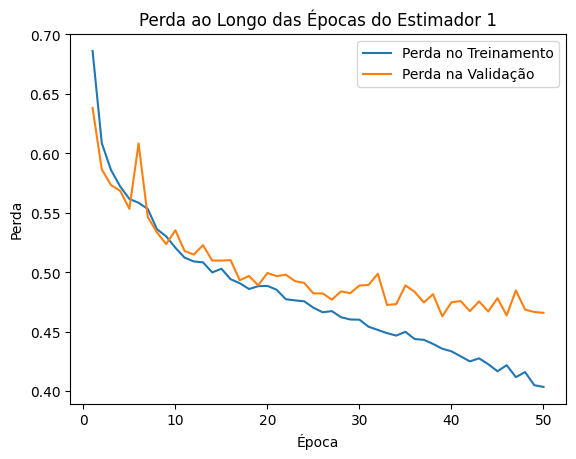

Training and validation of the estimator_0 has been completed!
-----------------------------------------------------------------

[2/10] Prepare to run the estimator_1's steps...

Creating estimator_1's datasets and dataloaders

A CSV file with ensemble_datasets/1_train_data name already exists

[Train DataFrame] 
total samples: 6300
non-melanoma samples: 3148 (49.97% of the total)
melanoma samples: 3152 (50.03% of the total)

The Train dataset was created successfully

A CSV file with ensemble_datasets/1_val_data name already exists

[Validate DataFrame] 
total samples: 1350
non-melanoma samples: 677 (50.15% of the total)
melanoma samples: 673 (49.85% of the total)

The Validate dataset was created successfully

Train dataloader settings: {'batch_size': 64, 'shuffle': True, 'num_workers': 12, 'pin_memory': True}
Validate dataloader settings: {'batch_size': 64, 'shuffle': False, 'num_workers': 12, 'pin_memory': True}

Starting training and validation of the estimator_1...

Epoch [1/50]

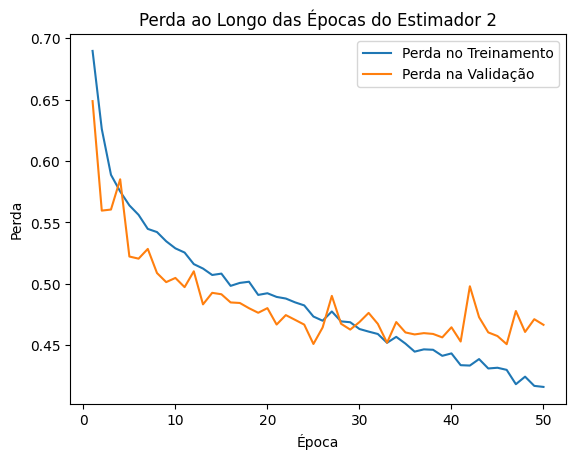

Training and validation of the estimator_1 has been completed!
-----------------------------------------------------------------

[3/10] Prepare to run the estimator_2's steps...

Creating estimator_2's datasets and dataloaders

A CSV file with ensemble_datasets/2_train_data name already exists

[Train DataFrame] 
total samples: 6300
non-melanoma samples: 3163 (50.21% of the total)
melanoma samples: 3137 (49.79% of the total)

The Train dataset was created successfully

A CSV file with ensemble_datasets/2_val_data name already exists

[Validate DataFrame] 
total samples: 1350
non-melanoma samples: 662 (49.04% of the total)
melanoma samples: 688 (50.96% of the total)

The Validate dataset was created successfully

Train dataloader settings: {'batch_size': 64, 'shuffle': True, 'num_workers': 12, 'pin_memory': True}
Validate dataloader settings: {'batch_size': 64, 'shuffle': False, 'num_workers': 12, 'pin_memory': True}

Starting training and validation of the estimator_2...

Epoch [1/50]

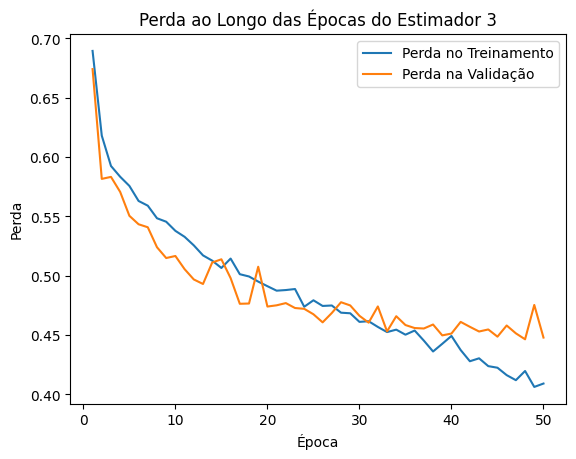

Training and validation of the estimator_2 has been completed!
-----------------------------------------------------------------

[4/10] Prepare to run the estimator_3's steps...

Creating estimator_3's datasets and dataloaders

A CSV file with ensemble_datasets/3_train_data name already exists

[Train DataFrame] 
total samples: 6300
non-melanoma samples: 3149 (49.98% of the total)
melanoma samples: 3151 (50.02% of the total)

The Train dataset was created successfully

A CSV file with ensemble_datasets/3_val_data name already exists

[Validate DataFrame] 
total samples: 1350
non-melanoma samples: 676 (50.07% of the total)
melanoma samples: 674 (49.93% of the total)

The Validate dataset was created successfully

Train dataloader settings: {'batch_size': 64, 'shuffle': True, 'num_workers': 12, 'pin_memory': True}
Validate dataloader settings: {'batch_size': 64, 'shuffle': False, 'num_workers': 12, 'pin_memory': True}

Starting training and validation of the estimator_3...

Epoch [1/50]

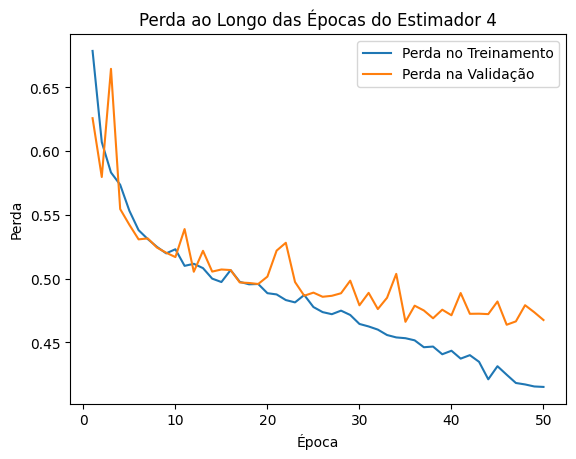

Training and validation of the estimator_3 has been completed!
-----------------------------------------------------------------

[5/10] Prepare to run the estimator_4's steps...

Creating estimator_4's datasets and dataloaders

A CSV file with ensemble_datasets/4_train_data name already exists

[Train DataFrame] 
total samples: 6300
non-melanoma samples: 3107 (49.32% of the total)
melanoma samples: 3193 (50.68% of the total)

The Train dataset was created successfully

A CSV file with ensemble_datasets/4_val_data name already exists

[Validate DataFrame] 
total samples: 1350
non-melanoma samples: 718 (53.19% of the total)
melanoma samples: 632 (46.81% of the total)

The Validate dataset was created successfully

Train dataloader settings: {'batch_size': 64, 'shuffle': True, 'num_workers': 12, 'pin_memory': True}
Validate dataloader settings: {'batch_size': 64, 'shuffle': False, 'num_workers': 12, 'pin_memory': True}

Starting training and validation of the estimator_4...

Epoch [1/50]

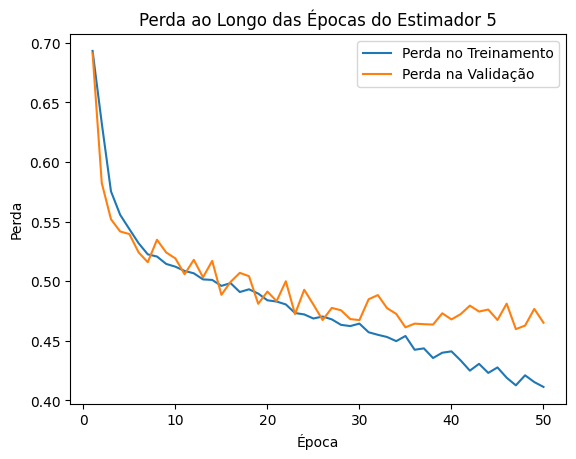

Training and validation of the estimator_4 has been completed!
-----------------------------------------------------------------

[6/10] Prepare to run the estimator_5's steps...

Creating estimator_5's datasets and dataloaders

A CSV file with ensemble_datasets/5_train_data name already exists

[Train DataFrame] 
total samples: 6300
non-melanoma samples: 3155 (50.08% of the total)
melanoma samples: 3145 (49.92% of the total)

The Train dataset was created successfully

A CSV file with ensemble_datasets/5_val_data name already exists

[Validate DataFrame] 
total samples: 1350
non-melanoma samples: 670 (49.63% of the total)
melanoma samples: 680 (50.37% of the total)

The Validate dataset was created successfully

Train dataloader settings: {'batch_size': 64, 'shuffle': True, 'num_workers': 12, 'pin_memory': True}
Validate dataloader settings: {'batch_size': 64, 'shuffle': False, 'num_workers': 12, 'pin_memory': True}

Starting training and validation of the estimator_5...

Epoch [1/50]

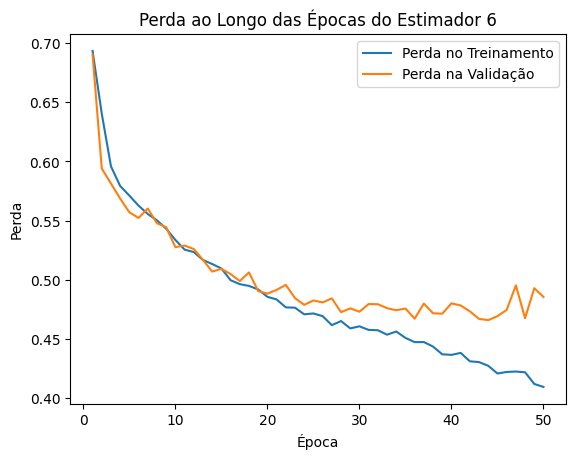

Training and validation of the estimator_5 has been completed!
-----------------------------------------------------------------

[7/10] Prepare to run the estimator_6's steps...

Creating estimator_6's datasets and dataloaders

A CSV file with ensemble_datasets/6_train_data name already exists

[Train DataFrame] 
total samples: 6300
non-melanoma samples: 3132 (49.71% of the total)
melanoma samples: 3168 (50.29% of the total)

The Train dataset was created successfully

A CSV file with ensemble_datasets/6_val_data name already exists

[Validate DataFrame] 
total samples: 1350
non-melanoma samples: 693 (51.33% of the total)
melanoma samples: 657 (48.67% of the total)

The Validate dataset was created successfully

Train dataloader settings: {'batch_size': 64, 'shuffle': True, 'num_workers': 12, 'pin_memory': True}
Validate dataloader settings: {'batch_size': 64, 'shuffle': False, 'num_workers': 12, 'pin_memory': True}

Starting training and validation of the estimator_6...

Epoch [1/50]

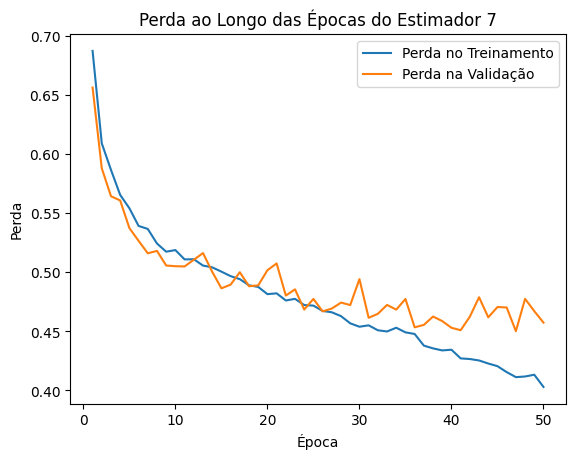

Training and validation of the estimator_6 has been completed!
-----------------------------------------------------------------

[8/10] Prepare to run the estimator_7's steps...

Creating estimator_7's datasets and dataloaders

A CSV file with ensemble_datasets/7_train_data name already exists

[Train DataFrame] 
total samples: 6300
non-melanoma samples: 3105 (49.29% of the total)
melanoma samples: 3195 (50.71% of the total)

The Train dataset was created successfully

A CSV file with ensemble_datasets/7_val_data name already exists

[Validate DataFrame] 
total samples: 1350
non-melanoma samples: 720 (53.33% of the total)
melanoma samples: 630 (46.67% of the total)

The Validate dataset was created successfully

Train dataloader settings: {'batch_size': 64, 'shuffle': True, 'num_workers': 12, 'pin_memory': True}
Validate dataloader settings: {'batch_size': 64, 'shuffle': False, 'num_workers': 12, 'pin_memory': True}

Starting training and validation of the estimator_7...

Epoch [1/50]

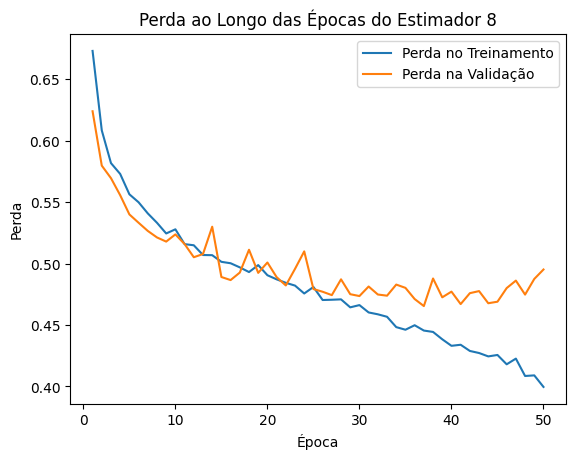

Training and validation of the estimator_7 has been completed!
-----------------------------------------------------------------

[9/10] Prepare to run the estimator_8's steps...

Creating estimator_8's datasets and dataloaders

A CSV file with ensemble_datasets/8_train_data name already exists

[Train DataFrame] 
total samples: 6300
non-melanoma samples: 3190 (50.63% of the total)
melanoma samples: 3110 (49.37% of the total)

The Train dataset was created successfully

A CSV file with ensemble_datasets/8_val_data name already exists

[Validate DataFrame] 
total samples: 1350
non-melanoma samples: 635 (47.04% of the total)
melanoma samples: 715 (52.96% of the total)

The Validate dataset was created successfully

Train dataloader settings: {'batch_size': 64, 'shuffle': True, 'num_workers': 12, 'pin_memory': True}
Validate dataloader settings: {'batch_size': 64, 'shuffle': False, 'num_workers': 12, 'pin_memory': True}

Starting training and validation of the estimator_8...

Epoch [1/50]

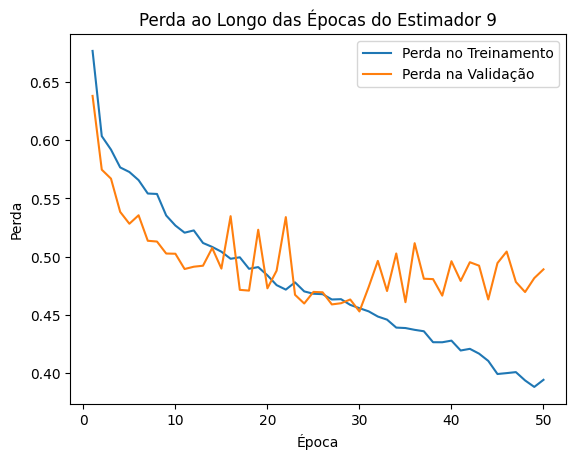

Training and validation of the estimator_8 has been completed!
-----------------------------------------------------------------

[10/10] Prepare to run the estimator_9's steps...

Creating estimator_9's datasets and dataloaders

A CSV file with ensemble_datasets/9_train_data name already exists

[Train DataFrame] 
total samples: 6300
non-melanoma samples: 3166 (50.25% of the total)
melanoma samples: 3134 (49.75% of the total)

The Train dataset was created successfully

A CSV file with ensemble_datasets/9_val_data name already exists

[Validate DataFrame] 
total samples: 1350
non-melanoma samples: 659 (48.81% of the total)
melanoma samples: 691 (51.19% of the total)

The Validate dataset was created successfully

Train dataloader settings: {'batch_size': 64, 'shuffle': True, 'num_workers': 12, 'pin_memory': True}
Validate dataloader settings: {'batch_size': 64, 'shuffle': False, 'num_workers': 12, 'pin_memory': True}

Starting training and validation of the estimator_9...

Epoch [1/50

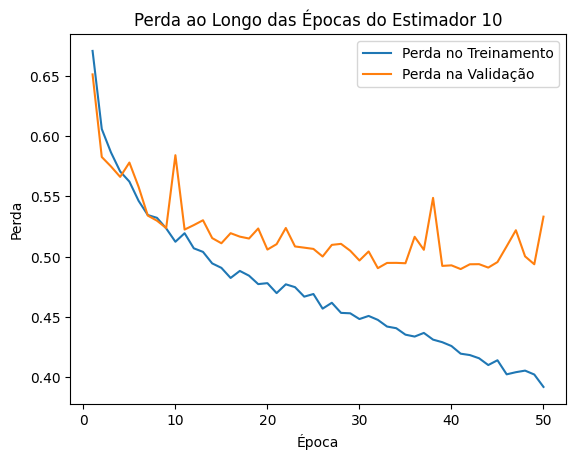

Training and validation of the estimator_9 has been completed!
-----------------------------------------------------------------

2024-09-23_17-09-22_ensemble_classifier.pth is saved



In [69]:
bec.fit(train_and_validate)

In [97]:
bec.set_ensemble_name('2024-09-23_17-09-22_ensemble_classifier.pth')

Ensemble mean train and validate losses


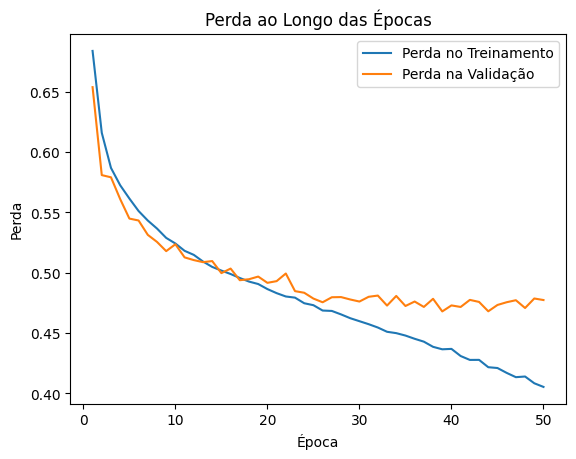

In [70]:
print('Ensemble mean train and validate losses')
ensemble_losses = calculate_mean_losses(bec.losses)
get_losses_belong_epochs(ensemble_losses)

In [76]:
def plot_estimators_losses(losses, orientation='h'):
    """
    Função para criar subplots, onde cada gráfico mostra as perdas de treino e validação de um estimador.
    """
    num_estimators = len(losses)

    if orientation == 'h':
      fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # Alterado para 2 linhas e 5 colunas
    else:
      fig, axes = plt.subplots(5, 2, figsize=(10, 20))  # Alterado para 5 linhas e 2 colunas
    fig.suptitle('Perda de Treino e Validação por Estimador', fontsize=16)

    # Iterar sobre os estimadores
    for i, ax in enumerate(axes.flat):  # axes.flat permite iterar facilmente por todas as subplots
        train_losses = [epoch[0] for epoch in losses[i]]  # Perdas de treino
        val_losses = [epoch[1] for epoch in losses[i]]    # Perdas de validação

        # Plotar a perda de treino e validação no gráfico correspondente
        ax.plot(range(1, len(train_losses) + 1), train_losses, label='Treino', color='blue')
        ax.plot(range(1, len(val_losses) + 1), val_losses, label='Validação', color='orange')

        # Configurar o gráfico
        ax.set_title(f'Estimador {i + 1}')
        ax.set_xlabel('Época')
        ax.set_ylabel('Perda')

        # Fixar a legenda no canto superior direito
        ax.legend(loc='upper right')

    # Ajustar os layouts para que os gráficos não se sobreponham
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deixar espaço para o título principal
    plt.show()

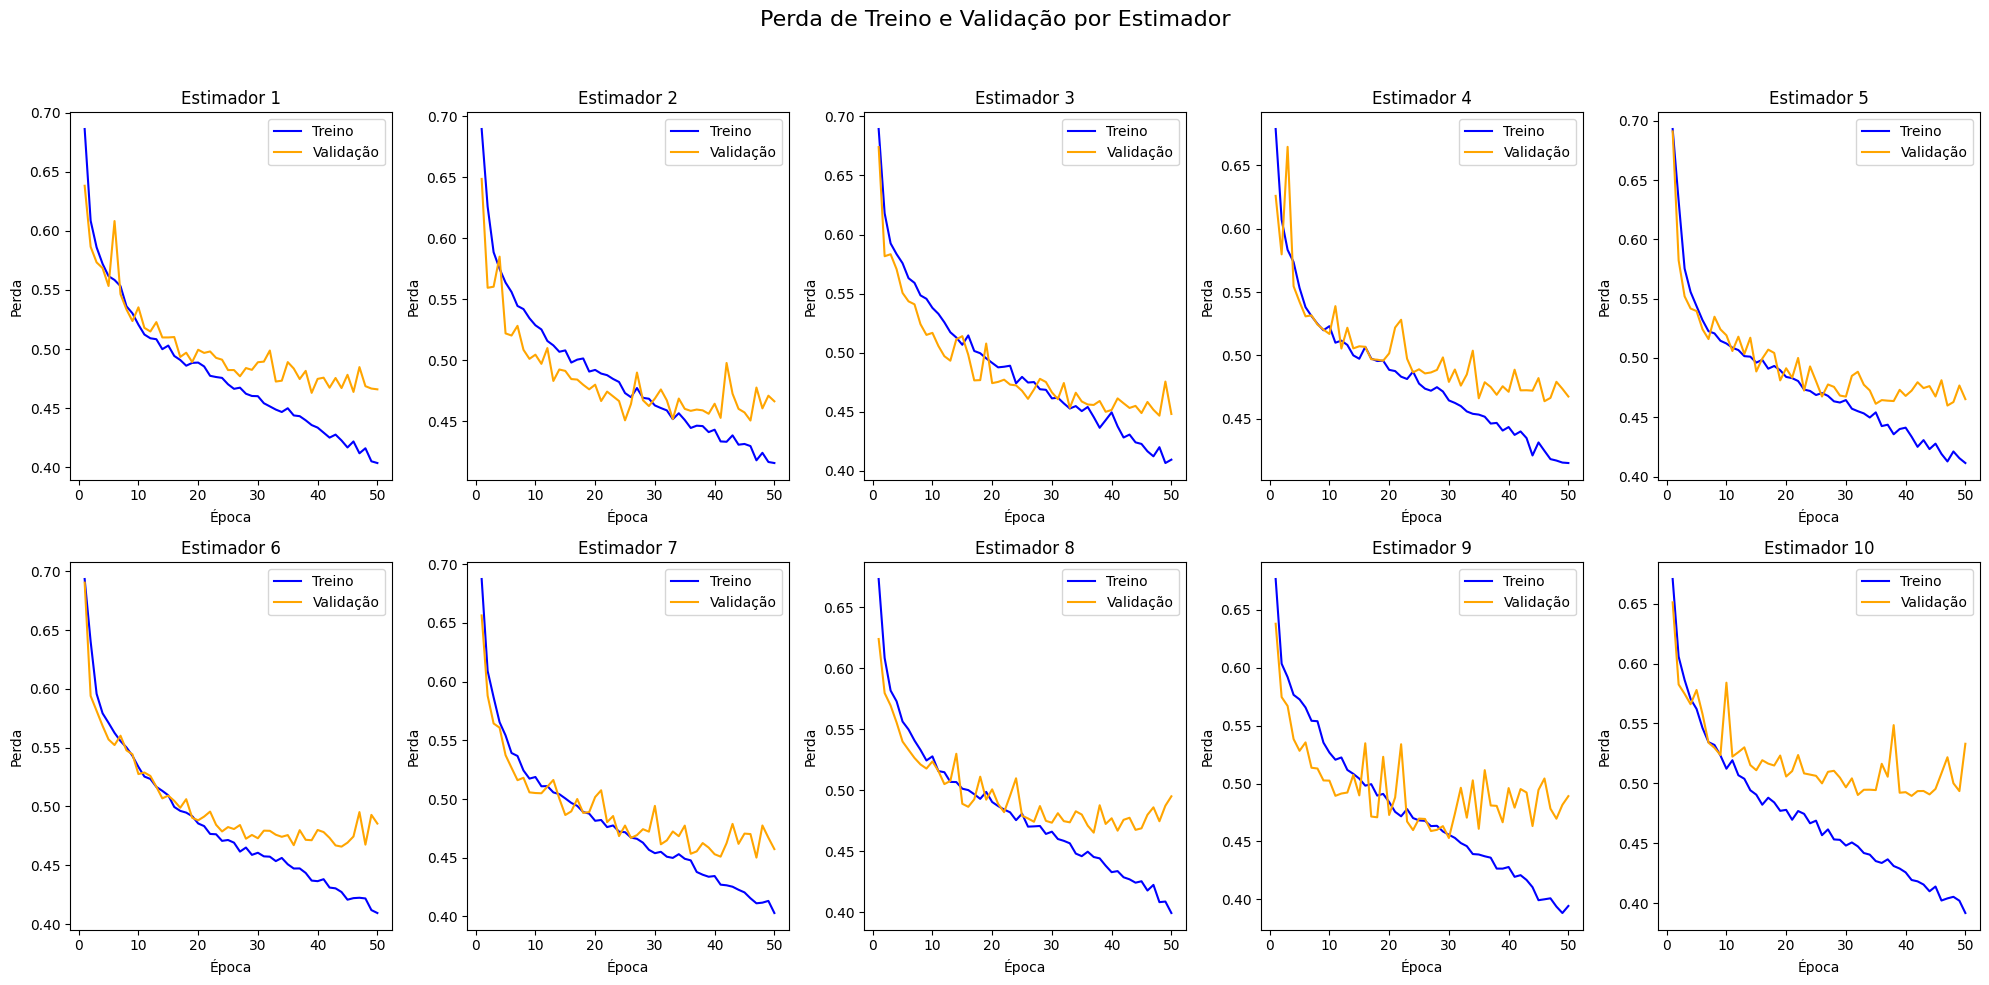

In [77]:
# Chamar a função para plotar os subplots
plot_estimators_losses(bec.losses)

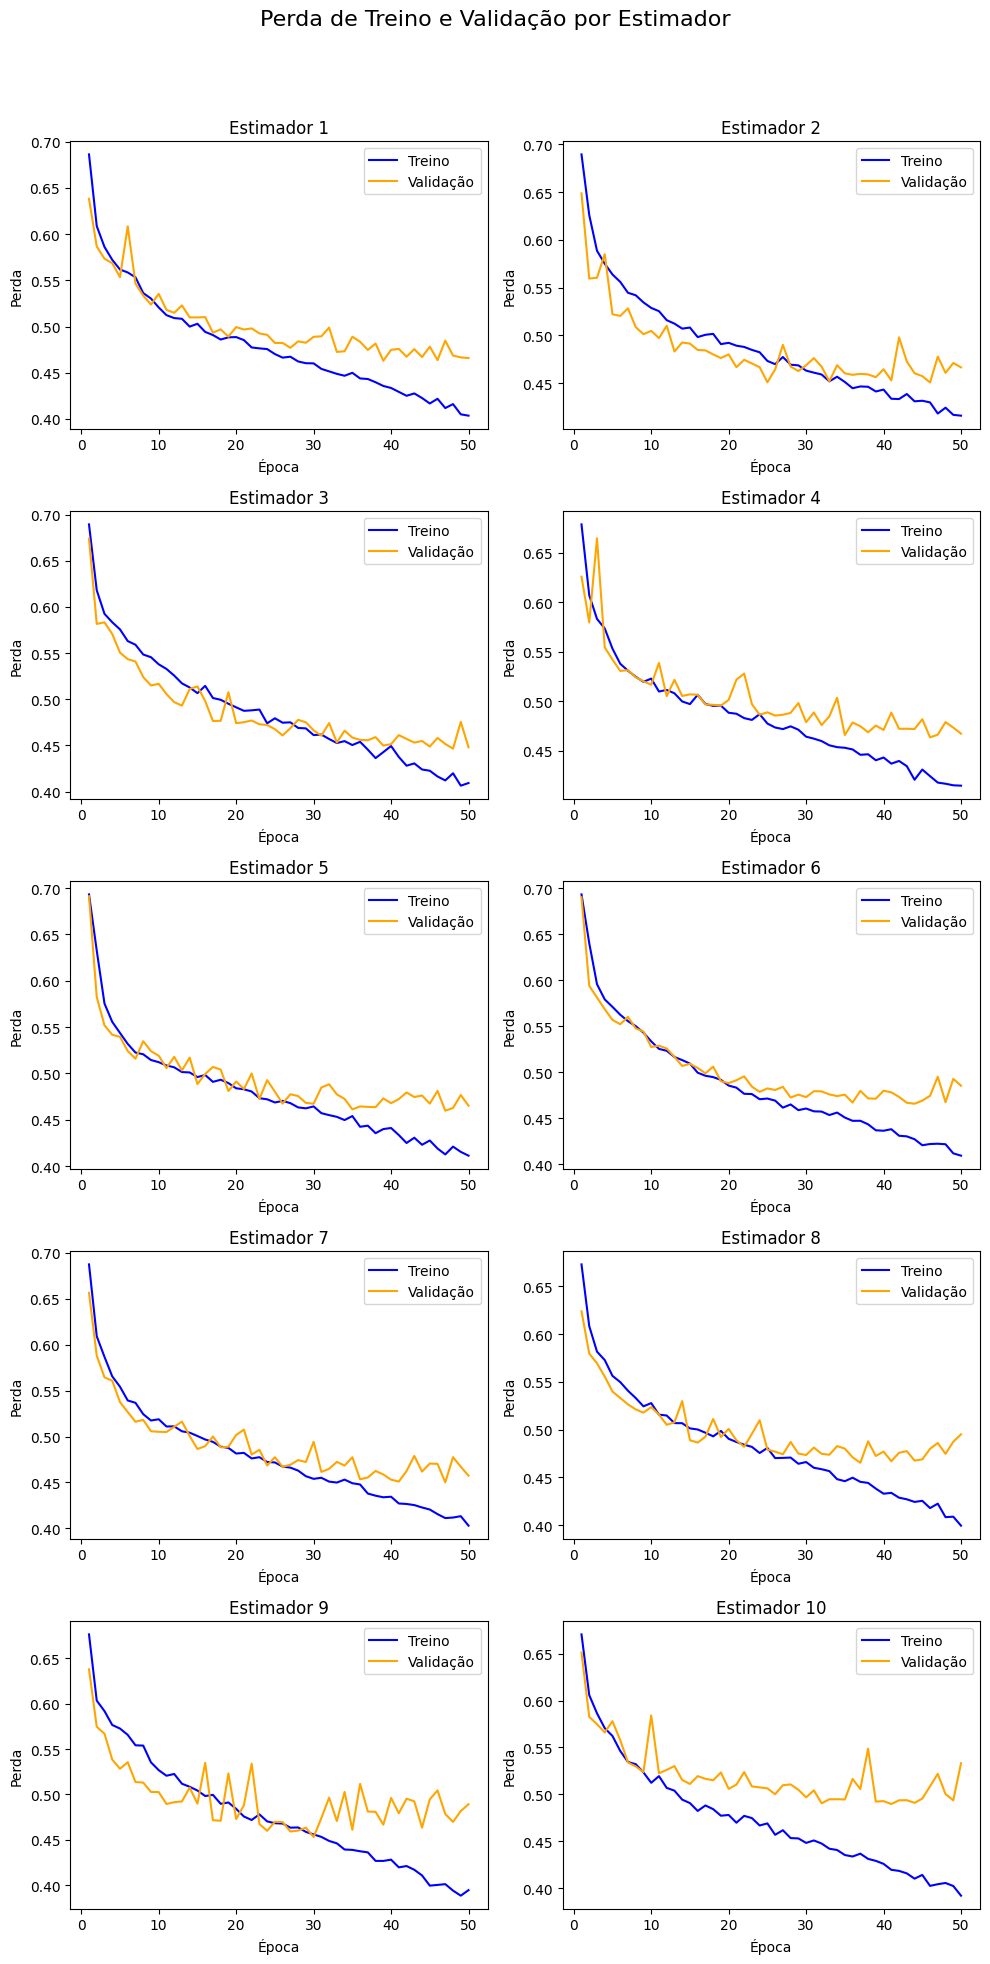

In [78]:
# Chamar a função para plotar os subplots
plot_estimators_losses(bec.losses, 'v')

In [110]:
# Teste com votação
test_labels, ensemble_predictions, estimators_predictions = bec.predict(test_loader)

2024-09-23_17-09-22_ensemble_classifier.pth is loaded and the estimators have beem updated with the best state_dicts

Preparing to get estimator_0 probabilities...
estimator_0 probabilities were obtained!

Preparing to get estimator_1 probabilities...
estimator_1 probabilities were obtained!

Preparing to get estimator_2 probabilities...
estimator_2 probabilities were obtained!

Preparing to get estimator_3 probabilities...
estimator_3 probabilities were obtained!

Preparing to get estimator_4 probabilities...
estimator_4 probabilities were obtained!

Preparing to get estimator_5 probabilities...
estimator_5 probabilities were obtained!

Preparing to get estimator_6 probabilities...
estimator_6 probabilities were obtained!

Preparing to get estimator_7 probabilities...
estimator_7 probabilities were obtained!

Preparing to get estimator_8 probabilities...
estimator_8 probabilities were obtained!

Preparing to get estimator_9 probabilities...
estimator_9 probabilities were obtained!

Th

In [111]:
current_date = gf_datetime(custom_format="%Y-%m-%d_%H-%M-%S", timezone_hours=-3)
test_labels_filename = f'{DATA_DIR}/ensemble_predictions/{current_date}_test_labels.npy'
ensemble_predictions_filename = f'{DATA_DIR}/ensemble_predictions/{current_date}_ensemble_predictions.npy'
estimators_predictions_filename = f'{DATA_DIR}/ensemble_predictions/{current_date}_estimators_predictions.npy'

In [112]:
# Salvando test_labels e ensemble_predictions em arquivos
np.save(test_labels_filename, test_labels)
np.save(ensemble_predictions_filename, ensemble_predictions)
np.save(estimators_predictions_filename, estimators_predictions)

In [114]:
# Carregando os arquivos
test_labels = np.load(test_labels_filename)
ensemble_predictions = np.load(ensemble_predictions_filename)
estimators_predictions = np.load(estimators_predictions_filename)

In [115]:
def get_metrics(ground_truth, predictions):
  accuracy = accuracy_score(ground_truth, predictions)
  precision = precision_score(ground_truth, predictions)
  recall = recall_score(ground_truth, predictions)
  f1score = f1_score(ground_truth, predictions)

  print(f'Acurácia: {accuracy:.6f} ({(accuracy * 100):.2f}%)')
  print(f'Precisão: {precision:.6f} ({(precision * 100):.2f}%)')
  print(f'Revocação: {recall:.6f} ({(recall * 100):.2f}%)')
  print(f'Pontuação F1: {f1score:.6f} ({(f1score * 100):.2f}%)')
  print('------------------------------------------')
  print('Relatório de Classificação:')
  print(classification_report(ground_truth, predictions, target_names=['non-melanoma', 'melanoma']))

  return accuracy, precision, recall, f1score

In [116]:
def calculate_mean_std(metric_scores):
    mean_score = np.mean(metric_scores)
    std_score = np.std(metric_scores)
    return mean_score, std_score

In [117]:
print(f'# Obtendo as métricas do Ensemble no conjunto de teste:\n')
ensemble_accuracy, ensemble_precision, ensemble_recall, ensemble_f1score = get_metrics(test_labels, ensemble_predictions)

# Obtendo as métricas do Ensemble no conjunto de teste:

Acurácia: 0.791111 (79.11%)
Precisão: 0.756863 (75.69%)
Revocação: 0.857778 (85.78%)
Pontuação F1: 0.804167 (80.42%)
------------------------------------------
Relatório de Classificação:
              precision    recall  f1-score   support

non-melanoma       0.84      0.72      0.78       675
    melanoma       0.76      0.86      0.80       675

    accuracy                           0.79      1350
   macro avg       0.80      0.79      0.79      1350
weighted avg       0.80      0.79      0.79      1350



Matriz de confusão do Ensemble no conjunto de teste:



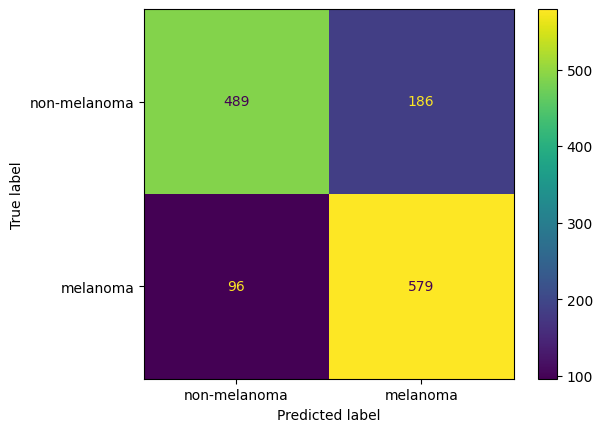

In [118]:
print('Matriz de confusão do Ensemble no conjunto de teste:\n')
ensemble_confusion_matrix = confusion_matrix_score(test_labels, ensemble_predictions)

confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=ensemble_confusion_matrix,
    display_labels=SkinLesionDataset.classes)

confusion_matrix_display.plot()

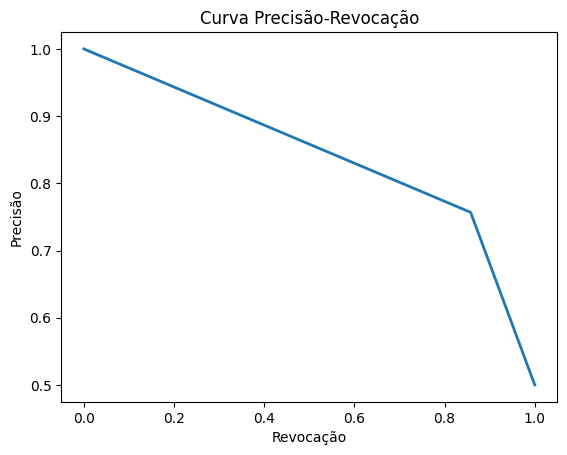

In [119]:
get_precision_recall_curve(test_labels, ensemble_predictions)

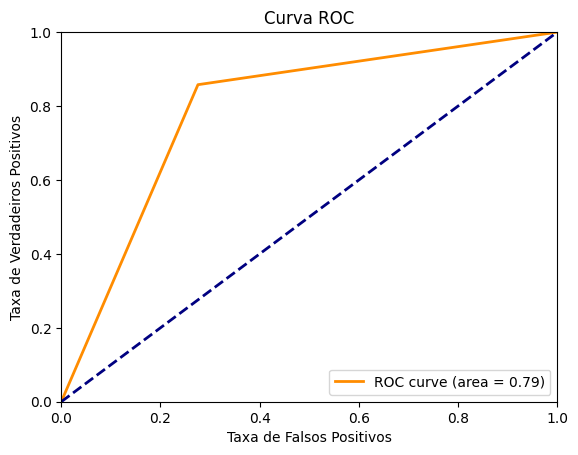

In [120]:
get_roc_auc_curve(test_labels, ensemble_predictions)

In [121]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for index, estimator_predictions in enumerate(estimators_predictions):
  print(f'# Obtendo as métricas do estimator_{index}:\n')
  accuracy, precision, recall, f1score = get_metrics(test_labels, estimator_predictions)

  accuracy_scores.append(accuracy)
  precision_scores.append(precision)
  recall_scores.append(recall)
  f1_scores.append(f1score)

  print('\n')

# Obtendo as métricas do estimator_0:

Acurácia: 0.781481 (78.15%)
Precisão: 0.739295 (73.93%)
Revocação: 0.869630 (86.96%)
Pontuação F1: 0.799183 (79.92%)
------------------------------------------
Relatório de Classificação:
              precision    recall  f1-score   support

non-melanoma       0.84      0.69      0.76       675
    melanoma       0.74      0.87      0.80       675

    accuracy                           0.78      1350
   macro avg       0.79      0.78      0.78      1350
weighted avg       0.79      0.78      0.78      1350



# Obtendo as métricas do estimator_1:

Acurácia: 0.780000 (78.00%)
Precisão: 0.751330 (75.13%)
Revocação: 0.837037 (83.70%)
Pontuação F1: 0.791871 (79.19%)
------------------------------------------
Relatório de Classificação:
              precision    recall  f1-score   support

non-melanoma       0.82      0.72      0.77       675
    melanoma       0.75      0.84      0.79       675

    accuracy                           0.78      1350

In [122]:
accuracy_mean, accuracy_std = calculate_mean_std(accuracy_scores)
precision_mean, precision_std = calculate_mean_std(precision_scores)
recall_mean, recall_std = calculate_mean_std(recall_scores)
f1_mean, f1_std = calculate_mean_std(f1_scores)

print(f"Estimadores - Accuracy: Mean={accuracy_mean:.6f}, Std={accuracy_std:.6f}")
print(f"Estimadores - Precision: Mean={precision_mean:.6f}, Std={precision_std:.6f}")
print(f"Estimadores - Recall: Mean={recall_mean:.6f}, Std={recall_std:.6f}")
print(f"Estimadores - F1 Score: Mean={f1_mean:.6f}, Std={f1_std:.6f}")

Estimadores - Accuracy: Mean=0.780222, Std=0.005573
Estimadores - Precision: Mean=0.745507, Std=0.010640
Estimadores - Recall: Mean=0.851704, Std=0.020554
Estimadores - F1 Score: Mean=0.794820, Std=0.006148


In [ ]:
# Disconnect runtime
runtime.unassign()